# Unsupervised Learning Examples
## 1. Principal Component Analysis
## 2. K-Means Clustering

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.datasets import make_blobs
import os
os.environ["OMP_NUM_THREADS"] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

data_dir = "C:/Users/jhtchns2/Box/ACE_592_SAE/Class_Examples/4_Analysis/"

## 1. PCA Examples

### 1a. Face Detection

An example from the Python Data Science Handbook

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=10)
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Andy Roddick' 'Ann Veneman' 'Ari Fleischer' 'Ariel Sharon'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill McBride' 'Bill Simon'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Donald Rumsfeld' 'Edmund Stoiber' 'Fidel Castro'
 'George HW Bush' 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gordon Brown' 'Hamid Karzai' 'Hans Blix'
 'Harrison Ford' 'Hillary Clinton' 'Hu Jintao' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'James Kelly' 'Jean Chretien'
 'Jeb Bush' 'Jennifer Aniston' 'Jennifer Capriati' 'John Ashcroft'
 'John Bolton' 'John Howard' 'Joschka Fischer' 'Juan Carlos Ferrero'
 'Julianne Moore' 'Junichiro Koizumi' 'Kofi Annan' 'Lance Armstrong'
 'Laura Bush' 'Lindsay Davenport' 'Lleyton Hewitt' 'Megawati Sukarnoputri'
 'Michael Bloomberg' 'Michael Schumacher' 'Mohammad Khatami'
 'Nicole Kidman' 'Pervez Musharraf' 

How can we break these faces down to their most basic components?

In [3]:
faces.data.shape

(3032, 2914)

So we have 3k rows, and a bunch of columns for the pixels.

Text(0.5, 1.0, 'Portion of Variance Explained')

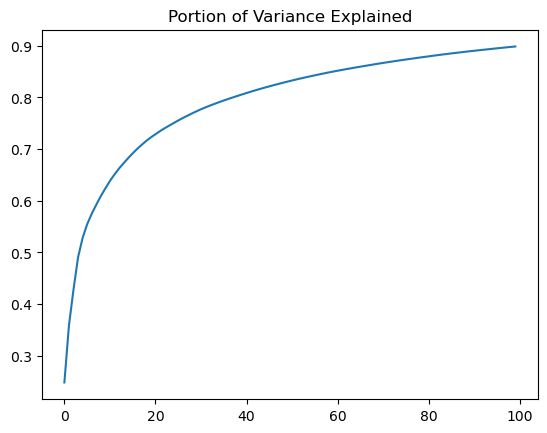

In [4]:
K = 100

pca_model = PCA(K)

pca_model = pca_model.fit(faces.data)

plt.plot(list(range(K)),pca_model.explained_variance_ratio_.cumsum())
plt.title("Portion of Variance Explained")

__How does this inform us about choice of K?__

Text(0.5, 1.0, 'Eigenvalues by Component')

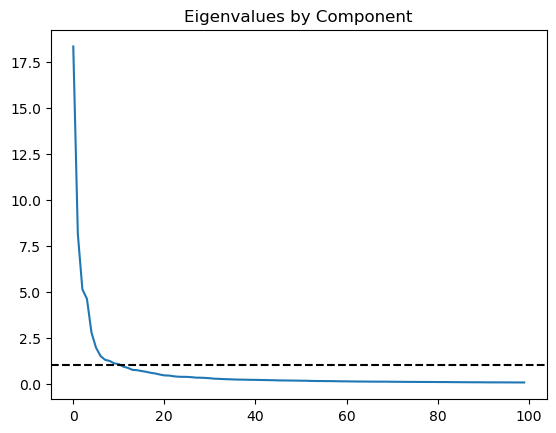

In [5]:
plt.plot(list(range(K)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color="black")
plt.title("Eigenvalues by Component")
#plt.ylim(0,2.5)

__What does this tell us?__

In the case of images, the PCA components can actually be visualized:

In [6]:
pca_model.components_.shape

(100, 2914)

These are the coordinates for the plane going through the data. Since each entry is a pixel value, we can reconstruct into an image.

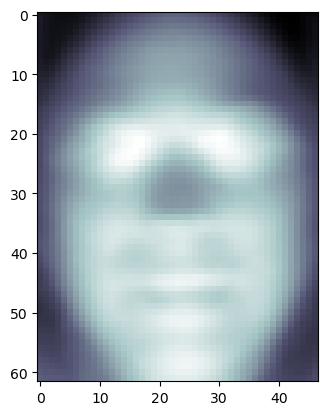

In [7]:
plt.imshow(pca_model.components_[2].reshape(62,47),cmap="bone")

__Why does it look like this you wonder?__

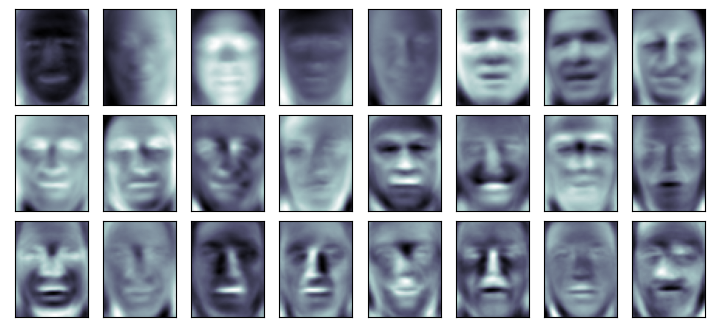

In [8]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_model.components_[i].reshape(62, 47), cmap='bone')

What are these? The are referred to as __"eigenfaces"__

Let's try reconstructing the data

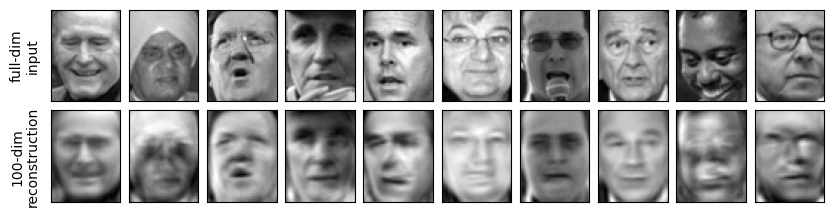

In [9]:
components = pca_model.transform(faces.data)
projected = pca_model.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

So just from 100 components we can make a fairly accurate representation of the faces!

### 1b. Making an Asset Index

Here we will demonstrate making an asset index using an Ethiopia LSMS survery round from 2011. The Living Standard Management Survey (LSMS) is a World Bank used for collecting household-level data.

In [10]:
df = pd.read_csv(data_dir+"asset_data.csv")

df

household_id        ea_id  rural           pw  saq01  saq02  saq03  \
0        1010101601002   1010101601      1  2236.134521      1      1      1   
1        1010101601002   1010101601      1  2236.134521      1      1      1   
2        1010101601002   1010101601      1  2236.134521      1      1      1   
3        1010101601002   1010101601      1  2236.134521      1      1      1   
4        1010101601002   1010101601      1  2236.134521      1      1      1   
...                ...          ...    ...          ...    ...    ...    ...   
138910  15010203102121  15010203102      1   202.670288     15      1      2   
138911  15010203102121  15010203102      1   202.670288     15      1      2   
138912  15010203102121  15010203102      1   202.670288     15      1      2   
138913  15010203102121  15010203102      1   202.670288     15      1      2   
138914  15010203102121  15010203102      1   202.670288     15      1      2   

        saq04  saq05  saq06  saq07  saq08  hh_s10q00             hh_s10q0a  \
0           8     88     16      1      2          1        Kerosene stove   
1           8     88     16      1      2          2     Butance Gas stove   
2           8     88     16      1      2          3        Electric stove   
3           8     88     16      1      2          4          Blanket/Gabi   
4           8     88     16      1      2          5   Mattress and/or bed   
...       ...    ...    ...    ...    ...        ...                   ...   
138910      8     88     31      2    121         31           Axe (Gejera   
138911      8     88     31      2    121         32       Pick Axe (Geso)   
138912      8     88     31      2    121         33  Plough (Traditional)   
138913      8     88     31      2    121         34       Plough (Modern)   
138914      8     88     31      2    121         35            Water pump   

        hh_s10q01  hh_s10q02_a  hh_s10q02_b  
0             2.0          1.0          2.0  
1             0.0          NaN          NaN  
2             0.0          NaN          NaN  
3             0.0          NaN          NaN  
4             3.0          1.0          2.0  
...           ...          ...          ...  
138910        0.0          NaN          NaN  
138911        0.0          NaN          NaN  
138912        0.0          NaN          NaN  
138913        0.0          NaN          NaN  
138914        0.0          NaN          NaN  

[138915 rows x 17 columns]

Data is in long format. Here I will convert to "wide"

In [11]:
assets = df.set_index(['household_id',"ea_id","hh_s10q0a"])["hh_s10q01"]

assets = assets.unstack()
assets

hh_s10q0a                   Axe (Gejera  Bicycle  Biogas stove (pit)  \
household_id   ea_id                                                   
1010101601002  1010101601           1.0      0.0                 0.0   
1010101601017  1010101601           0.0      0.0                 0.0   
1010101601034  1010101601           0.0      0.0                 0.0   
1010101601049  1010101601           0.0      0.0                 0.0   
1010101601064  1010101601           1.0      0.0                 0.0   
...                                 ...      ...                 ...   
15010203102072 15010203102          0.0      0.0                 0.0   
15010203102087 15010203102          1.0      0.0                 0.0   
15010203102099 15010203102          0.0      0.0                 0.0   
15010203102109 15010203102          0.0      0.0                 0.0   
15010203102121 15010203102          0.0      0.0                 0.0   

hh_s10q0a                   Blanket/Gabi  Butance Gas stove  \
household_id   ea_id                                          
1010101601002  1010101601            0.0                0.0   
1010101601017  1010101601            0.0                0.0   
1010101601034  1010101601            0.0                0.0   
1010101601049  1010101601            0.0                0.0   
1010101601064  1010101601            2.0                0.0   
...                                  ...                ...   
15010203102072 15010203102           0.0                0.0   
15010203102087 15010203102           5.0                0.0   
15010203102099 15010203102           2.0                0.0   
15010203102109 15010203102           2.0                0.0   
15010203102121 15010203102           2.0                0.0   

hh_s10q0a                   CD/VCD/DVD/Video Deck  Cart (Animal Drawn  \
household_id   ea_id                                                    
1010101601002  1010101601                     0.0                 0.0   
1010101601017  1010101601                     0.0                 0.0   
1010101601034  1010101601                     0.0                 0.0   
1010101601049  1010101601                     0.0                 0.0   
1010101601064  1010101601                     0.0                 0.0   
...                                           ...                 ...   
15010203102072 15010203102                    0.0                 0.0   
15010203102087 15010203102                    0.0                 0.0   
15010203102099 15010203102                    0.0                 0.0   
15010203102109 15010203102                    0.0                 0.0   
15010203102121 15010203102                    0.0                 0.0   

hh_s10q0a                   Cart (Hand pushed)  Electric stove  \
household_id   ea_id                                             
1010101601002  1010101601                  0.0             0.0   
1010101601017  1010101601                  0.0             0.0   
1010101601034  1010101601                  0.0             0.0   
1010101601049  1010101601                  0.0             0.0   
1010101601064  1010101601                  0.0             0.0   
...                                        ...             ...   
15010203102072 15010203102                 0.0             0.0   
15010203102087 15010203102                 1.0             0.0   
15010203102099 15010203102                 0.0             0.0   
15010203102109 15010203102                 0.0             0.0   
15010203102121 15010203102                 0.0             0.0   

hh_s10q0a                   Fixed line telephone  ...  Sewing machine  \
household_id   ea_id                              ...                   
1010101601002  1010101601                    0.0  ...             0.0   
1010101601017  1010101601                    0.0  ...             0.0   
1010101601034  1010101601                    0.0  ...             0.0   
1010101601049  1010101601                    0.0  ...             0.0

To make this "asset index" we can apply PCA to this long list of household assets.

#### Very Important: Always standardize data before using PCA.

In [12]:
assets_std = (assets - assets.mean())/assets.std()


Let's try fitting a model with 3 components.

In [13]:
pca_model = PCA(n_components=3)

pca_model = pca_model.fit(assets_std.fillna(0))

pca_model.transform(assets_std.fillna(0))

array([[ 1.02087442,  2.27136154,  2.09018566],
       [-0.99696621,  0.08838061,  1.57002773],
       [-0.59263516, -1.70428258, -0.41187695],
       ...,
       [-0.55353906, -1.57043618, -0.74301276],
       [-1.06501862, -1.89873671, -0.28666103],
       [-1.06501862, -1.89873671, -0.28666103]])

So now we have created a 3-d coordinate system out of the several asset variables we have.

How are these components related to our asset measurements?

In [14]:
pca_model.explained_variance_ratio_

array([0.34687576, 0.07889105, 0.06602763])

So the first component explains 34% while the next two explain about 8 to 7%. Let's try more components:

In [15]:
K = 20
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

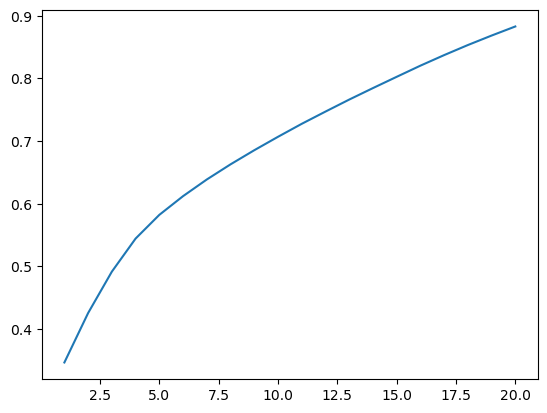

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,K+1)),pca_model.explained_variance_ratio_.cumsum())

__What does this rule seem to say?__

Let's look at the eigenvalue rule:

In [17]:
pca_model.explained_variance_

array([12.14038922,  2.76112709,  2.31091697,  1.84605459,  1.32391038,
        1.04466678,  0.92961891,  0.84578834,  0.78823197,  0.74969537,
        0.72470169,  0.68301479,  0.66994173,  0.64177856,  0.62908966,
        0.62333682,  0.5889711 ,  0.56243739,  0.5297065 ,  0.50735792])

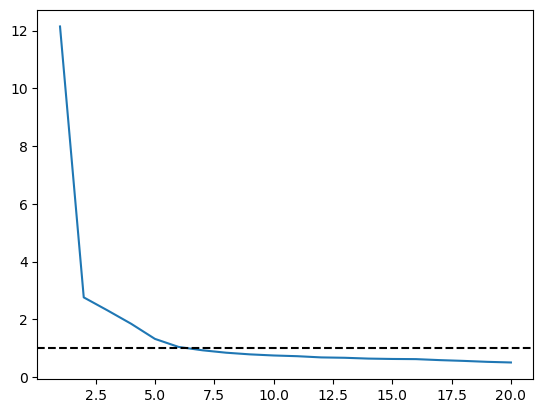

In [18]:
plt.plot(list(range(1,K+1)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color='black')

__So this rule seems to point to what?__

In [19]:
K = 6
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

Now let's look at how it correlates with the variables.

In [20]:
load_scores = pd.DataFrame(pca_model.components_)
load_scores

0         1         2         3         4         5         6   \
0  0.025774  0.219597  0.225090  0.029967  0.197703  0.230394  0.228354   
1  0.155256 -0.052247 -0.065157  0.398284 -0.063645  0.013283 -0.080686   
2  0.105936 -0.048385  0.208752 -0.120504  0.043655 -0.198897  0.010500   
3  0.075424  0.218307 -0.186363 -0.087260 -0.001488  0.121966  0.259740   
4  0.598852  0.002012  0.032186 -0.212835 -0.028398 -0.060582 -0.027016   
5 -0.044319 -0.004748 -0.059346 -0.007548 -0.092024  0.048905 -0.001613   

         7         8         9   ...        25        26        27        28  \
0  0.224661  0.208746  0.197394  ...  0.231250  0.146718 -0.002959  0.183581   
1 -0.073709 -0.065607 -0.009819  ... -0.076991  0.130515  0.366022 -0.036781   
2 -0.016591  0.071506 -0.095328  ...  0.011417 -0.075347  0.296038 -0.066972   
3  0.224381 -0.006055  0.119245  ...  0.243846 -0.261752  0.177683  0.150244   
4  0.000276 -0.052937 -0.047883  ... -0.040152 -0.043843 -0.171202 -0.043274   
5 -0.017631 -0.101021  0.065868  ... -0.012244 -0.056948  0.182526 -0.011371   

         29        30        31        32        33        34  
0  0.219671  0.166052  0.159982  0.183652  0.110318  0.088104  
1  0.034652  0.035454 -0.028510 -0.015908 -0.047281  0.218625  
2 -0.245484  0.098185  0.136735  0.187009  0.146630 -0.156697  
3  0.089107 -0.226069 -0.114929 -0.175953 -0.166172  0.007197  
4 -0.050883  0.046088  0.120443  0.040110 -0.011596  0.205980  
5  0.041078 -0.112291  0.367888 -0.050179 -0.112272 -0.058188  

[6 rows x 35 columns]

In [21]:
pca_model.explained_variance_ratio_

array([0.34687576, 0.07889102, 0.06602742, 0.05274343, 0.03782494,
       0.02981601])

In [22]:
load_scores.columns = assets.columns

In [23]:
load_scores.T.sort_values(5,ascending=False)

0         1         2         3  \
hh_s10q0a                                                               
Plough (Modern)                0.078180  0.068389  0.173917 -0.031658   
Water pump                     0.159982 -0.028510  0.136735 -0.114929   
Sickle (Machid)               -0.002959  0.366022  0.296038  0.177683   
Jewels (Gold and Silver)       0.067810  0.260531 -0.226558 -0.179584   
Fixed line telephone           0.197394 -0.009819 -0.095328  0.119245   
Mobile Telephone               0.113368  0.196152 -0.293087 -0.059063   
CD/VCD/DVD/Video Deck          0.230394  0.013283 -0.198897  0.121966   
Television                     0.219671  0.034652 -0.245484  0.089107   
Satelite Dish                  0.243427 -0.014020 -0.138558  0.150898   
Radio                          0.106432  0.243079 -0.179531 -0.000317   
Cart (Animal Drawn             0.228354 -0.080686  0.010500  0.259740   
Bicycle                        0.219597 -0.052247 -0.048385  0.218307   
Blanket/Gabi                   0.029967  0.398284 -0.120504 -0.087260   
Motorcycle                     0.245941 -0.097955  0.018954  0.251427   
Sofa set                       0.183581 -0.036781 -0.066972  0.150244   
Sewing machine                 0.231250 -0.076991  0.011417  0.243846   
Refrigerator                   0.223143 -0.028851  0.089500 -0.215225   
Cart (Hand pushed)             0.224661 -0.073709 -0.016591  0.224381   
Private car                    0.222370 -0.061129  0.201715 -0.201626   
Mitad - electric               0.234217 -0.054931  0.159784 -0.213903   
Mattress and/or bed            0.065481  0.344328 -0.234679 -0.117227   
Axe (Gejera                    0.025774  0.155256  0.105936  0.075424   
Mitad - power saving (modern)  0.155277  0.034289  0.016415 -0.269806   
Water storage pit              0.183652 -0.015908  0.187009 -0.175953   
Shelf for storing goods        0.146718  0.130515 -0.075347 -0.261752   
Wrist wastch/clock             0.088104  0.218625 -0.156697  0.007197   
Biogas stove (pit)             0.225090 -0.065157  0.208752 -0.186363   
Butance Gas stove              0.197703 -0.063645  0.043655 -0.001488   
Electric stove                 0.208746 -0.065607  0.071506 -0.006055   
Mofer and Kember               0.009480  0.355663  0.341085  0.171869   
Weaving equipment              0.110318 -0.047281  0.146630 -0.166172   
Wardrobe                       0.166052  0.035454  0.098185 -0.226069   
Kerosene stove                 0.142498  0.032398 -0.081676 -0.118767   
Pick Axe (Geso)                0.023373  0.160036  0.145463  0.125905   
Plough (Traditional)           0.018817  0.342765  0.334247  0.207057   

                                      4         5  
hh_s10q0a                                          
Plough (Modern)                0.063313  0.805145  
Water pump                     0.120443  0.367888  
Sickle (Machid)               -0.171202  0.182526  
Jewels (Gold and Silver)      -0.172102  0.110061  
Fixed line telephone          -0.047883  0.065868  
Mobile Telephone               0.175673  0.051033  
CD/VCD/DVD/Video Deck         -0.060582  0.048905  
Television                    -0.050883  0.041078  
Satelite Dish                 -0.043363  0.028532  
Radio                          0.194683  0.019693  
Cart (Animal Drawn            -0.027016 -0.001613  
Bicycle                        0.002012 -0.004748  
Blanket/Gabi                  -0.212835 -0.007548  
Motorcycle                    -0.029460 -0.008444  
Sofa set                      -0.043274 -0.011371  
Sewing machine                -0.040152 -0.012244  
Refrigerator                   0.018653 -0.016435  
Cart (Hand pushed)             0.000276 -0.017631  
Private car                    0.031593 -0.031990  
Mitad - electric               0.014345 -0.036598  
Mattress and/or bed            0.038197 -0.041851  
Axe (Gejera                    0.598852 -0.044319  
Mitad - power saving (modern) -0.124607 -0.050170  
Water storage pit              0.040

So how might we try and interpret these components?

Here is a class I wrote to interface with the model easier.

In [24]:
class PCA_Model:
    def __init__(self,ncomps,data,cols):
        
        self.ncomps = ncomps
        self.cols = cols
        self.data = data
        self.scaled_data = StandardScaler().fit_transform(data[cols].values)
        
    def fit(self):
        self.PCA_obj = PCA(self.ncomps).fit(self.scaled_data)
    
    def describe(self):
        explvar_ = self.PCA_obj.explained_variance_ratio_

        explvar = pd.DataFrame(explvar_[np.newaxis,:]*100,\
                               columns=["Component " + str(x) for x in range(self.ncomps)],\
                               index=["% Explained Variance"])
        
        loadscores_ = self.PCA_obj.components_
        loadscores = pd.DataFrame(loadscores_,\
                                  columns=self.cols,\
                                  index=["Component " + str(x) for x in range(self.ncomps)])
        print("Explains {0:0.2f}% of the variance".format(round(sum(explvar_),2)*100))
        print(explvar)
        print(loadscores)
        return explvar,loadscores
    
    def gen_data(self):
        return self.PCA_obj.transform(self.scaled_data)
    
    def graph(self,alpha=.6):
        self.graphdata = pd.concat([self.data[[color]].reset_index(drop=True),\
                                    pd.DataFrame(self.gen_data()).reset_index(drop=True)],axis=1)
        if self.ncomps==2:
            return self.graphdata.plot(kind="scatter",x=0,y=1,\
                                       c=color,alpha=alpha,colormap=cm)
        else:
            ax = plt.axes(projection='3d')
            ax.scatter3D(self.graphdata[0], \
                         self.graphdata[1], \
                         self.graphdata[2])#, \
                         #c=color,colormap=cm)
    

In [25]:
pca4 = PCA_Model(10,assets.fillna(0),assets.columns)
pca4.fit()
var,load_scores = pca4.describe();

Explains 71.00% of the variance
                      Component 0  Component 1  Component 2  Component 3  \
% Explained Variance    34.686671      7.89023     6.602062     5.274366   

                      Component 4  Component 5  Component 6  Component 7  \
% Explained Variance     3.781585     2.984127     2.654506     2.414851   

                      Component 8  Component 9  
% Explained Variance     2.239844     2.132984  
hh_s10q0a    Axe (Gejera   Bicycle  Biogas stove (pit)  Blanket/Gabi  \
Component 0     0.025776  0.219593            0.225092      0.029982   
Component 1     0.155297 -0.052369           -0.065100      0.398437   
Component 2     0.106171 -0.048326            0.208754     -0.120608   
Component 3     0.077360  0.218019           -0.186509     -0.087103   
Component 4     0.597931  0.001748            0.031946     -0.216292   
Component 5    -0.039556 -0.004497           -0.059973      0.007191   
Component 6    -0.079089 -0.074176           -0.041622     -

## 2. K-means Examples

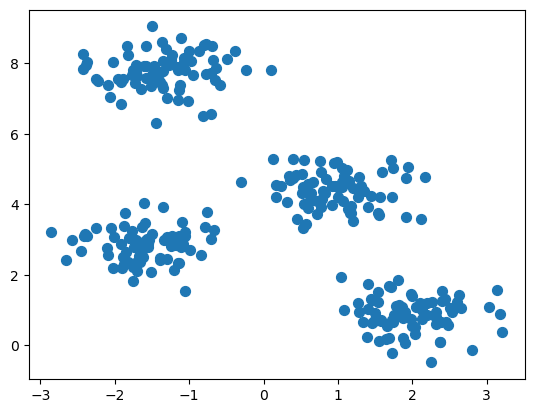

In [29]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

So let's see how K-means will find this rather obviously clustered data.


In [30]:
kmeans = KMeans(n_clusters=2,n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


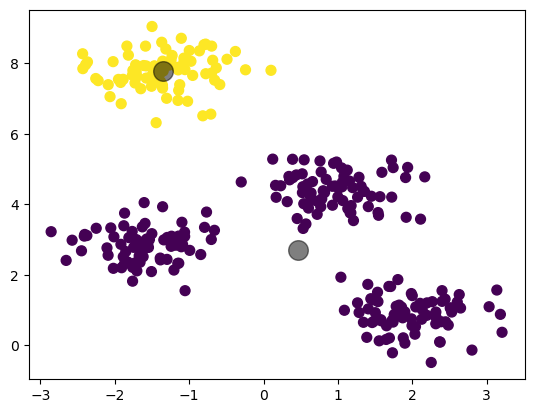

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

So 2 picks up one but not the others. Let's try again:

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


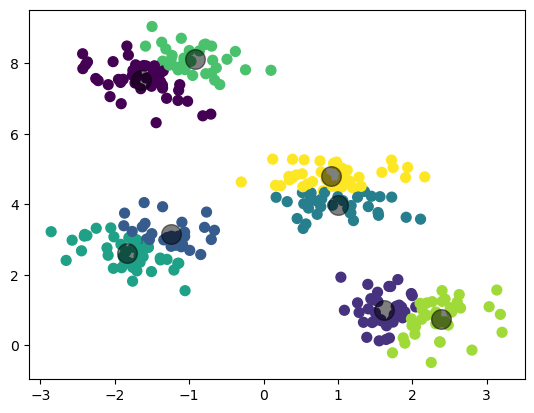

In [32]:
kmeans = KMeans(n_clusters=8,n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

What would our Heuristics say?

In [34]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K,n_init="auto").fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_


C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

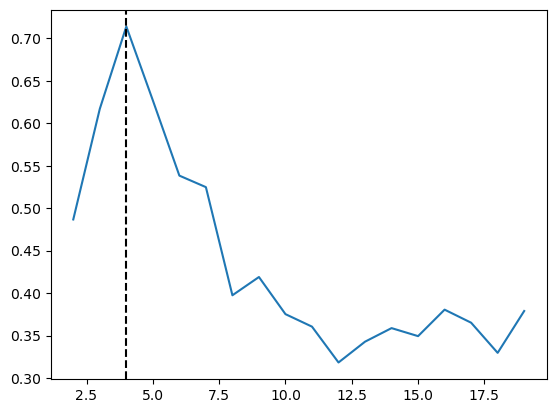

In [35]:
K=20

sil_scores =[score_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(4,color="black",ls="--")

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

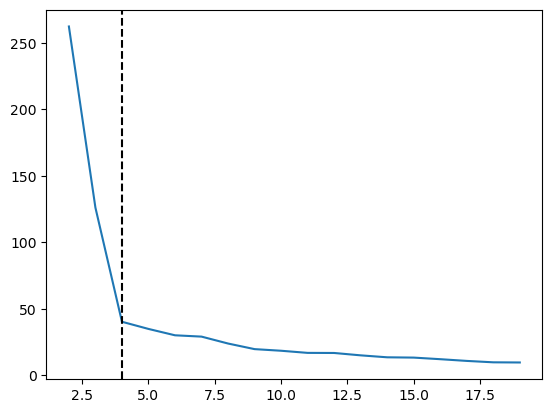

In [36]:
init_scores =[inertia_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(4,color="black",ls="--")

Pretty clear what the optimum is.

Let's try a more connected dataset.

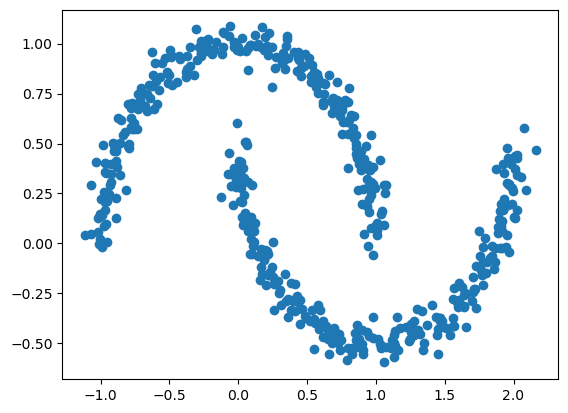

In [39]:
noisy_moons = datasets.make_moons(n_samples=500, noise=.05)

plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1])

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


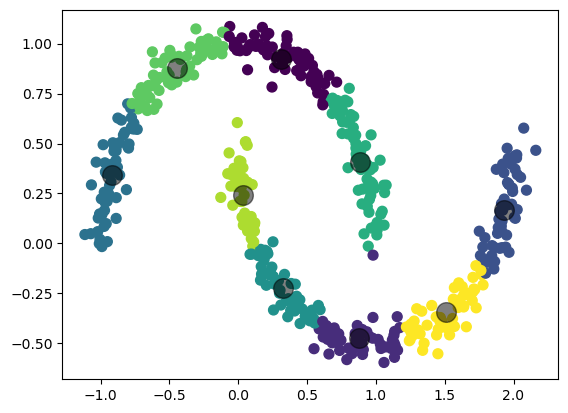

In [42]:
X2 = noisy_moons[0]

kmeans = KMeans(n_clusters=9,n_init="auto")
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Not so good. Let's look at heuristics.

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

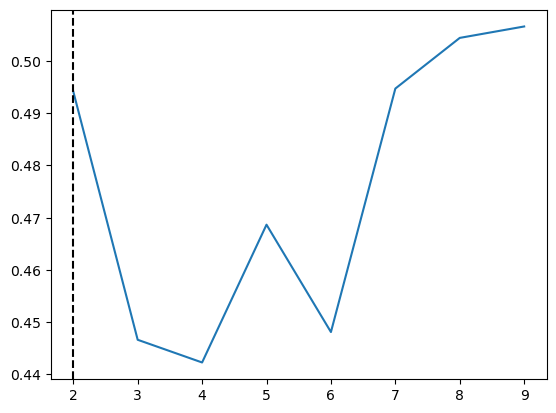

In [41]:
K = 10
sil_scores =[score_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(2,color="black",ls="--")

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

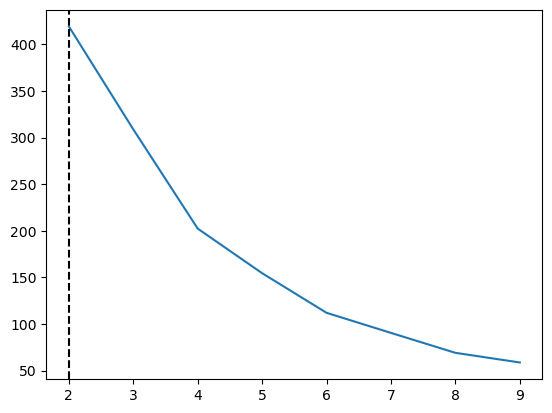

In [43]:
init_scores =[inertia_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(2,color="black",ls="--")

So in the case of this data, we would not be able to determine any optimal value.

### Consumption Clustering of Households

Going back to our LSMS example, let's look at how households spend their money across food, non-food items, and education.

In [44]:
df = pd.read_csv(data_dir+"consumption_data.csv")
df = df.dropna()
df = df.set_index("household_id")
df2 = df[["nonfood_cons_ann","educ_cons_ann","food_cons_ann"]]
cols_of_interest = ["Non-Food","Education","Food"]
df2.columns =["Non-Food","Education","Food"]

df2.head()

Non-Food  Education          Food
household_id                                    
1010101601002    4560.0       92.0  10816.000488
1010101601017    4066.0        0.0   8034.000488
1010101601034    1874.0        0.0   2652.000000
1010101601049    2162.0       88.0   8606.000000
1010101601064    3756.0      108.0  14583.126367

In [45]:
px.scatter_3d(df2,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2])

In [46]:
cons = pd.DataFrame(df2[cols_of_interest].values / df[['adulteq']].values)

cons.columns = cols_of_interest
cons.index = df.index
cons_std = (cons - cons.mean())/cons.std()

# Remove outlier
cons_std = cons_std[cons_std['Non-Food']<50]

In [51]:
kmeans = KMeans(4)
kmeans = kmeans.fit(cons_std)
cons_std['cluster'] = kmeans.predict(cons_std)

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [52]:
px.scatter_3d(cons_std,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2],color='cluster')

### What do you think?

In [ ]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K,n_init="auto").fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_

Let's look at some heuristics:

Text(0.5, 1.0, 'Silhouette Score')

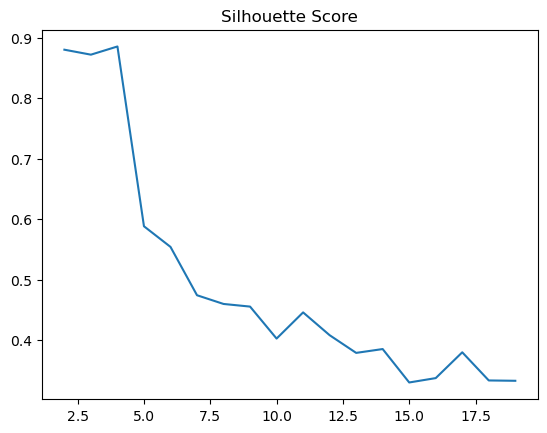

In [53]:
scores = [score_by_k(df2[cols_of_interest],x) for x in range(2,20)]

import matplotlib.pyplot as plt
plt.plot(list(range(2,20)),scores)
plt.title("Silhouette Score")

Text(0.5, 1.0, 'Inertia Score')

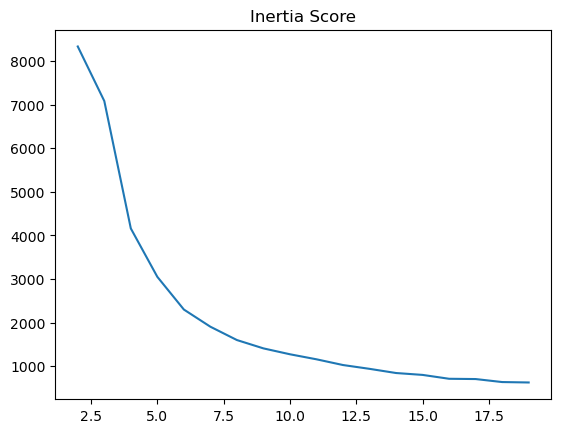

In [54]:
inertia_scores = [inertia_by_k(df2[cols_of_interest],x) for x in range(2,20)]
plt.plot(list(range(2,20)),inertia_scores)
plt.title("Inertia Score")

In [55]:
cons_std.groupby("cluster").mean()

Non-Food  Education      Food
cluster                               
0       -0.093921  -0.068565 -0.279131
1        1.058331  18.841688  0.427229
2        0.054532  -0.112230  8.093080
3        0.345980   0.131456  0.888899

In [ ]:
K = 5

kmeans = KMeans(K,n_init="auto")
kmeans = kmeans.fit(cons_std)
cons_std['cluster'] = kmeans.predict(cons_std)

px.scatter_3d(cons_std,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2],color='cluster')